# CREDIT RISK PREDICTION ANALYSIS

## INTRODUCTION
ID/x with collaboration with Leading Company melakukan sebuah prediksi credit risk customer dengan mempertimbangkan jenis pinjaman yang dilakukan oleh customer. Data yang tersedia adalah data pinjaman yang diterima dan ditolak oleh customer di Leading Company. 

referensi code: https://www.kaggle.com/code/psycon/credit-risk-analysis-eda-statistics-visualization#Target-Variable

In [1]:
# Import Necessary Python Fuctions
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint

# data manipulation
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# statistics
from scipy import stats

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# missing values
# import missingno as msno

# CamelCase to snake_case
import inflection

# association between attributes
# from dython.nominal import associations

# word cloud
from wordcloud import WordCloud, STOPWORDS

# data preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import matplotlib as mpl

text_color = '#1F2933'
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.labelcolor'] = text_color
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color


In [2]:
! pip install dython

  Using cached numpy-1.24.2-cp39-cp39-win_amd64.whl (14.9 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS\\anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [3]:
from dython.nominal import associations

In [4]:
# Read Dataset `loan_data_2007_2014.csv`
data = pd.read_csv('loan_data_2007_2014.csv')
data.head(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3557786497.py:2: DtypeWarning:

Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.654,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


source : https://github.com/adhang/lendingclub-loan-credit-risk/blob/main/LendingClub_Loan_Credit_Risk_EDA.ipynb

# Visualization Function

### Stacked Bar Plot

In [5]:
def stacked_bar_plot(data, x, y, orient='horizontal', 
                     ax=None, show=True, annot=True, sortby='values', 
                     title=None, index_type=None, color=['#FC4F30', '#008FD5']):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6), facecolor='#F5F7FA')
    ax.set_facecolor('#F5F7FA')
  
  # create specific color
  if color == 'single':
    color = ['#FC4F30', '#C2C2C2']

  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['Bad', 'Good'], axis=1)
  if index_type != None:
    crosstab.index = crosstab.index.astype(index_type)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    if sortby == 'index':
      crosstab = crosstab.sort_index(ascending=True)
    else:
      crosstab = crosstab.sort_values('Bad', ascending=False)
    crosstab.plot(kind='bar', stacked=True, color=color, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(x=i,
                    y=(y_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    if sortby == 'index':
      crosstab = crosstab.sort_index(ascending=False)
    else:
      crosstab = crosstab.sort_values('Bad', ascending=True)
    crosstab.plot(kind='barh', stacked=True, color=color, ax=ax)

    # add percentage label
    if annot:
      for i, index in enumerate(crosstab.index):
          for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
            ax.text(y=i,
                    x=(x_loc - proportion) + (proportion / 2),
                    s=f'{proportion*100:.1f}%',
                    color='white',
                    fontsize=14,
                    fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  if title == None:
    x_titleize = inflection.titleize(x)
    ax.set_title(f'Loan Credit Risk Probability by {x_titleize}')
  else:
    ax.set_title(title)
    
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

### Wordcloud

In [6]:
def wordcloud_plot(wordcloud, title, show=True, ax=None):
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6), facecolor='#F5F7FA')
    ax.set_facecolor('#F5F7FA')

  ax.imshow(wordcloud)
  ax.axis('off')
  ax.set_title(title, size=24, fontweight='bold', pad=20)

  if show:
    plt.show()

### Rank Bar Plot

In [7]:
def rank_bar_plot(data, x, y, threshold_top=5, threshold_bot=None, 
                  custom_label=False, ax=None, show=True, 
                  show_bot=True, fmt='%.2f', title=None):
  
  # custom palette top associations
  if threshold_bot == None:
    threshold_bot = data.size - threshold_top - 1

  palette = []
  if show_bot:
    for i in range(0, len(data)):
      if i < threshold_top:
        palette.append('#008FD5') # blue
      elif i > threshold_bot:
        palette.append('#FC4F30') # red
      else:
        palette.append('silver')
  else:
    for i in range(0, len(data)):
      if i < threshold_top:
        palette.append('#008FD5') # blue
      else:
        palette.append('silver')

  if ax == None:
    _, ax = plt.subplots(figsize=(8,6), facecolor='#F5F7FA')
    ax.set_facecolor('#F5F7FA')

  sns.barplot(x=x, y=y, ax=ax, palette=palette, saturation=1)

  if custom_label == True:
    # custom y label color
    for i, label in enumerate(ax.yaxis.get_ticklabels()):
      if (i >= threshold_top) and (i <= threshold_bot):
        label.set_color('silver')
  
    # custom bar label visibility
    for con in ax.containers:
      # labels = [val for val in con.datavalues]
      labels = con.datavalues
      labels_len = len(labels)

      # masking the top 3 an bottom 3
      np.put(labels, np.arange(3,labels_len-3), [-1])
      
      # hide the labels for non-top 3 and non-bottom 3
      labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

      ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')
  else:
    ax.bar_label(ax.containers[0], padding=3, fmt=fmt, fontsize=14, fontweight='medium')

  ax.set_xticklabels([])
  sns.despine(left=True, bottom=True)

  if title == None:
    if isinstance(data, pd.Series):
      name_titleize = inflection.titleize(data.name)
    elif isinstance(data, pd.DataFrame):
      name_titleize = inflection.titleize(data.index.name)
    else:
      name_titleize = 'Ranked Bar Plot'
    ax.set_title(name_titleize)
  else:
    ax.set_title(title)

  if show:
    plt.show()
  

### KDE Probability PLot

In [8]:
def kde_proba_plot(data, x, hue, ax=None, show=True, xlabel=None, alpha=0.9,
                   xticks_step=100, palette=['#008FD5', '#FC4F30']):
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6), facecolor='#F5F7FA')
    ax.set_facecolor('#F5F7FA')
  
  if xlabel == None:
    xlabel = inflection.titleize(x)

  if palette == 'single':
    palette = ['#C2C2C2', '#FC4F30']

  ax.grid(False, axis='x')

  sns.kdeplot(data=data, x=x, hue=hue, multiple='fill',
              linewidth=3, ax=ax, alpha=alpha, palette=palette)
  sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

  ax.set_xticks(np.arange(0, data[x].max(), xticks_step))
  ax.set_xlim(data[x].min(), data[x].max())
  ax.set_xlabel(xlabel)

  ax.set_yticks(np.linspace(0,1,5))
  ax.set_ylabel('probability')

  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

### Heatmap Correlation

In [9]:

def heatmap_corr_plot(data, mask=None, annot=None, cbar=False,
                      ax=None, show=True):
  if mask:
    mask = np.triu(np.ones_like(data, dtype=bool))

  if ax == None:
    _, ax = plt.subplots(figsize=(40,40), facecolor='#F5F7FA')
    ax.set_facecolor('#F5F7FA')

  sns.heatmap(data, vmin=-1, vmax=1, cbar=False,
              cmap='coolwarm', linewidth=1, mask=mask,
              square=True, annot=annot, annot_kws={'fontsize':16}, fmt='.2f', ax=ax)

  if show:
    plt.show()

# EXPLORATORY DATA ANALYSIS

## Target Variable

### Identification Target Variable

In [10]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Based on LendingClub, the definition of each status is:

- `Fully Paid`: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
- `Current`: Loan is up to date on all outstanding payments.
- `In Grace Period`: Loan is past due but within the 15-day grace period.
- `Late (16-30)`: Loan has not been current for 16 to 30 days.
- `Late (31-120)`: Loan has not been current for 31 to 120 days.
- `Default`: Loan has not been current for 121 days or more.
- `Charged Off`: Loan for which there is no longer a reasonable expectation of further payments. Generally, Charge Off occurs no later than 30 days after the Default status is reached.

Based on those descriptions, I will create a new feature whether the loan status is Good or Bad.
- Good = 1
- Bad = 0

The Good status is when the loan status is either `Current` or `Fully Paid`, otherwise the status is Bad.


I won't include the Does not meet the `credit policy. Status:Fully Paid` as a Good status, because it doesn't meet the credit policy.

In [11]:

good_status = ['Fully Paid', 'Current']

data_eda = data.copy()

data_eda['target'] = data_eda['loan_status'].apply(lambda x: 1 if x in good_status else 0)

### Target Distribution

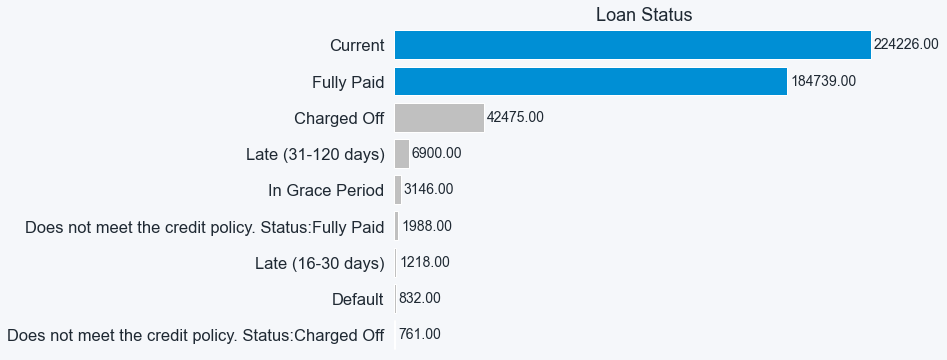

In [12]:
data_tmp = data_eda['loan_status'].value_counts()

rank_bar_plot(data=data_tmp, x=data_tmp.values, y=data_tmp.index,
              threshold_top=2, show_bot=False)


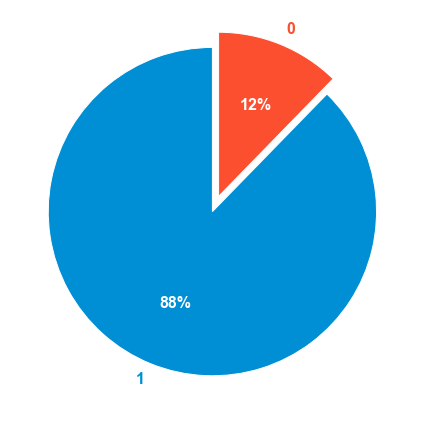

In [13]:
# Pie Chart

pie_data = data_eda['target'].value_counts(normalize=True).values * 100
pie_label = data_eda['target'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

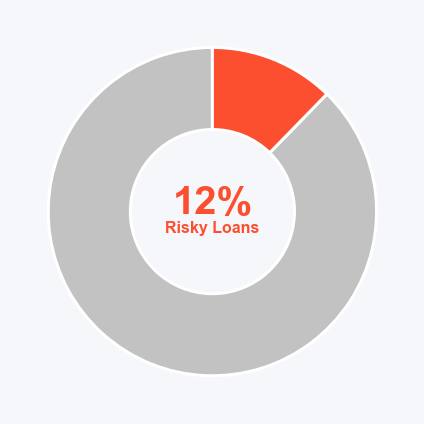

In [14]:

pie_data = data_eda['target'].value_counts(normalize=True).values * 100
pie_label = data_eda['target'].value_counts(normalize=True).index.to_list()

_, ax = plt.subplots(figsize=(8,6), facecolor='#F5F7FA')
ax.set_facecolor('#F5F7FA')

wedges = ax.pie(pie_data, startangle=90,
                wedgeprops={'width':0.5, 'linewidth':3},
                colors=['#C2C2C2', '#FC4F30'])

text_1 = f'{pie_data[1]:.0f}%'
text_2 = 'Risky Loans'

ax.text(0, 0.05, text_1, fontsize=40, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')
ax.text(0, -0.1, text_2, fontsize=16, fontweight='bold', color='#FC4F30',
        horizontalalignment='center',
        verticalalignment='center')

plt.tight_layout()
# fname = 'target-distribution.svg'
# save_fig(fname)
plt.show()

kita dapat mengetahui bahwa terdapat 12% data yang dikategorikan Risky Loans

dari data tersebut, kita dapat mengetahui bahwa dataset ini `Imbalance`

## DESCRIPTIVE STATISTICS AND DATA CLEANING

In [15]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [16]:
# data.isnull().sum().sort_values(ascending=False)
check_missing = data_eda.isnull().sum() * 100 / data_eda.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

dti_joint                      1.000e+02
annual_inc_joint               1.000e+02
total_cu_tl                    1.000e+02
inq_fi                         1.000e+02
all_util                       1.000e+02
max_bal_bc                     1.000e+02
open_rv_24m                    1.000e+02
open_rv_12m                    1.000e+02
il_util                        1.000e+02
total_bal_il                   1.000e+02
mths_since_rcnt_il             1.000e+02
open_il_24m                    1.000e+02
open_il_12m                    1.000e+02
open_il_6m                     1.000e+02
open_acc_6m                    1.000e+02
verification_status_joint      1.000e+02
inq_last_12m                   1.000e+02
mths_since_last_record         8.657e+01
mths_since_last_major_derog    7.877e+01
desc                           7.298e+01
mths_since_last_delinq         5.369e+01
next_pymnt_d                   4.873e+01
total_rev_hi_lim               1.507e+01
tot_coll_amt                   1.507e+01
tot_cur_bal     

Data yang memiliki nilai null lebih dari 75% akan didrop, dan data yang semuanya null akan didrop juga

In [17]:
datadrop= data_eda.dropna(axis=1, how='all')   # untuk menghapus kolom jika semua isinya adalah nan

Memisahkan Kolom Target dari datadrop

In [18]:
datadrop.drop(['target'], axis=1, inplace=True)
datadrop.drop(['loan_status'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\4149237035.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\4149237035.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Selanjutnya, pembuangan fitur-fitur yang tidak berguna dilakukan. Contohnya seperti fitur yang merupakan id unik, berupa free text dsb.

In [19]:

# Kolom yang memiliki lebih dari 80% missing value akan didrop 
datadrop.drop(columns=['mths_since_last_record'],inplace=True)
datadrop.drop(columns=['mths_since_last_major_derog'],inplace=True)

# unique id
datadrop.drop(columns=['id'],inplace=True)
datadrop.drop(columns=['member_id'],inplace=True)

# free text
datadrop.drop(columns=['url'],inplace=True)
datadrop.drop(columns=['desc'],inplace=True)

# expert judgment
datadrop.drop(columns=['sub_grade'],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3974650124.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3974650124.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3974650124.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3974650124.py:7: SettingWithCopyWarning:


A value is tryi

In [20]:
datadrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   loan_amnt                   466285 non-null  int64  
 2   funded_amnt                 466285 non-null  int64  
 3   funded_amnt_inv             466285 non-null  float64
 4   term                        466285 non-null  object 
 5   int_rate                    466285 non-null  float64
 6   installment                 466285 non-null  float64
 7   grade                       466285 non-null  object 
 8   emp_title                   438697 non-null  object 
 9   emp_length                  445277 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466281 non-null  float64
 12  verification_status         466285 non-null  object 
 13  issue_d       

In [21]:
datadrop.isnull().sum().sort_values(ascending=False)

mths_since_last_delinq        250351
next_pymnt_d                  227214
total_rev_hi_lim               70276
tot_cur_bal                    70276
tot_coll_amt                   70276
emp_title                      27588
emp_length                     21008
last_pymnt_d                     376
revol_util                       340
collections_12_mths_ex_med       145
last_credit_pull_d                42
delinq_2yrs                       29
total_acc                         29
open_acc                          29
acc_now_delinq                    29
inq_last_6mths                    29
earliest_cr_line                  29
pub_rec                           29
title                             20
annual_inc                         4
addr_state                         0
installment                        0
recoveries                         0
collection_recovery_fee            0
home_ownership                     0
last_pymnt_amnt                    0
grade                              0
i

### List Column

In [22]:

column_numerical = datadrop.select_dtypes(include=np.number).columns.values.tolist()
column_numerical

['Unnamed: 0',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [23]:

column_categorical = datadrop.select_dtypes(exclude=np.number).columns.values.tolist()
column_categorical

['term',
 'grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

### Feature Cardinality
kita akan melihat variasi dari tiap kolom

In [24]:
datadrop[column_categorical].apply(lambda x: x.unique())

term                                            [ 36 months,  60 months]
grade                                              [B, C, A, E, F, D, G]
emp_title              [nan, Ryder, AIR RESOURCES BOARD, University M...
emp_length             [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership                   [RENT, OWN, MORTGAGE, OTHER, NONE, ANY]
verification_status            [Verified, Source Verified, Not Verified]
issue_d                [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1...
pymnt_plan                                                        [n, y]
purpose                [credit_card, car, small_business, other, wedd...
title                  [Computer, bike, real estate business, persone...
zip_code               [860xx, 309xx, 606xx, 917xx, 972xx, 852xx, 280...
addr_state             [AZ, GA, IL, CA, OR, NC, TX, VA, MO, CT, UT, F...
earliest_cr_line       [Jan-85, Apr-99, Nov-01, Feb-96, Jan-96, Nov-0...
initial_list_status                                

In [25]:
data_eda[column_categorical].nunique().sort_values()

application_type            1
initial_list_status         2
pymnt_plan                  2
term                        2
verification_status         3
home_ownership              6
grade                       7
emp_length                 11
purpose                    14
addr_state                 50
issue_d                    91
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
earliest_cr_line          664
zip_code                  888
title                   63099
emp_title              205475
dtype: int64

- kolom `application_type` hanya memiliki 1 variasi
- terdapat beberapa kolom yang memiliki terlalu banyak variasi, hal ini akan menganggu model, jadi kita akan drop kolom kolom tersebut


### Dropping Columns

In [26]:
# dropping kolom yang memiliki single variasi
datadrop.drop(columns= ['application_type'], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3823342520.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
# dropping kolom cardinality
datadrop.drop(columns=[ 'emp_title', 'title', 'zip_code'], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\1203207518.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Update Columns List

In [28]:

column_numerical = datadrop.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = datadrop.select_dtypes(exclude=np.number).columns.values.tolist()

datadrop[column_categorical].nunique().sort_values()

term                     2
pymnt_plan               2
initial_list_status      2
verification_status      3
home_ownership           6
grade                    7
emp_length              11
purpose                 14
addr_state              50
issue_d                 91
last_pymnt_d            98
next_pymnt_d           100
last_credit_pull_d     103
earliest_cr_line       664
dtype: int64

### Merubah Format Date menjadi Numeric
Dalam step ini, akan dilakukan modifikasi beberapa fitur ke dalam format yang dapat dilakukan Modeling


#### 1. `emp_length`
Memodifikasi `emp_length`. Contoh: 4 years -> 4

In [29]:
datadrop['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [30]:
datadrop['emp_length_int']= datadrop['emp_length'].str.replace('\+ years', '')
datadrop['emp_length_int']= datadrop['emp_length_int'].str.replace('< 1 year', str(0))
datadrop['emp_length_int']= datadrop['emp_length_int'].str.replace('years', '')
datadrop['emp_length_int']= datadrop['emp_length_int'].str.replace('year', '')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\2779051013.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\2779051013.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\2779051013.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\2779051013.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy 

In [31]:
datadrop['emp_length_int']= datadrop['emp_length_int'].astype(float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\1576949986.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
datadrop.drop(['emp_length'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\407862251.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 2. `term`

In [33]:
datadrop['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [34]:
datadrop['term'] = datadrop['term'].str.replace(' months', '')
datadrop['term'] = datadrop['term'].astype(float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\1978720745.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\1978720745.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 3. `earliest_cr_line`
Memodifikasi `earliest_cr_line` dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. Untuk melakukan hal ini, umumnya digunakan reference date = hari ini. Namun, karena dataset ini merupakan dataset tahun 2007-2014, maka akan lebih relevan jika menggunakan reference date di sekitar tahun 2017. Dalam contoh ini, saya menggunakan tanggal 2017-12-01 sebagai reference date.

In [35]:
datadrop['earliest_cr_line_date'] = pd.to_datetime(datadrop['earliest_cr_line'], format='%b-%y')
datadrop['earliest_cr_line_date'].head(3)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\415940459.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [36]:
datadrop['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - datadrop['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
datadrop['mths_since_earliest_cr_line'].head(3)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3098005990.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [37]:
datadrop['mths_since_earliest_cr_line'].describe()

count    466256.000
mean        239.482
std          93.975
min        -612.000
25%         183.000
50%         225.000
75%         285.000
max         587.000
Name: mths_since_earliest_cr_line, dtype: float64

terdapat nilai yang negatif

In [38]:
datadrop[datadrop['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Ternyata nilai negatif muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, padahal seharusnya merupakan tahun 1962.

Untuk mengatasi hal ini, dapat dilakukan preprocessing lebih jauh jika ingin membenarkan tahun 2062 menjadi 1962. Namun, kali ini saya hanya mengubah nilai yang negatif menjadi nilai maximum dari fitur tersebut. Karena di sini saya mengetahui bahwa nilai-nilai yang negatif artinya adalah data yang sudah tua (tahun 1900an), maka masih masuk akal jika saya mengganti nilai-nilai tersebut menjadi nilai terbesar.

In [39]:
datadrop.loc[datadrop['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = datadrop['mths_since_earliest_cr_line'].max()

In [40]:
datadrop.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\2217242756.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 4. `issue_d`

In [41]:
datadrop['issue_d_date'] = pd.to_datetime(datadrop['issue_d'], format='%b-%y')
datadrop['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - datadrop['issue_d_date']) / np.timedelta64(1, 'M')))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\362002517.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\362002517.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
datadrop['mths_since_issue_d'].describe()

count    466285.000
mean         51.255
std          14.340
min          36.000
25%          41.000
50%          47.000
75%          57.000
max         126.000
Name: mths_since_issue_d, dtype: float64

In [43]:
datadrop.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\434408809.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 5. `last_pymnt_d`

In [44]:
datadrop['last_pymnt_d_date'] = pd.to_datetime(datadrop['last_pymnt_d'], format='%b-%y')
datadrop['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - datadrop['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\4156762458.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\4156762458.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
datadrop['mths_since_issue_d'].describe()

count    466285.000
mean         51.255
std          14.340
min          36.000
25%          41.000
50%          47.000
75%          57.000
max         126.000
Name: mths_since_issue_d, dtype: float64

In [46]:
datadrop.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\729415446.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 6. `next_pymnt_d`

In [47]:
datadrop['next_pymnt_d_date'] = pd.to_datetime(datadrop['next_pymnt_d'],format='%b-%y')
datadrop['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - datadrop['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\636845253.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\636845253.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
datadrop['mths_since_next_pymnt_d'].describe()

count    239071.000
mean         22.738
std           6.082
min          21.000
25%          22.000
50%          22.000
75%          22.000
max         120.000
Name: mths_since_next_pymnt_d, dtype: float64

In [49]:
datadrop.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\2707727880.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 7. `last_credit_pull_d`

In [50]:
datadrop['last_credit_pull_d_date']= pd.to_datetime(datadrop['last_credit_pull_d'], format='%b-%y')
datadrop['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - datadrop['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\86990343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\86990343.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
datadrop['mths_since_last_credit_pull_d'].describe()

count    466243.000
mean         27.046
std           9.636
min          23.000
25%          23.000
50%          23.000
75%          25.000
max         127.000
Name: mths_since_last_credit_pull_d, dtype: float64

In [52]:
datadrop.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\1316952816.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## DUPLICATE VALUE

In [53]:
datadrop.duplicated().any()

False

tidak terdapat data duplicate dalam dataset ini

## OUTLIERS

In [54]:
#membagi data dalam numerik dan kategorik
num = datadrop.select_dtypes('number').columns
kat = datadrop.select_dtypes('object').columns

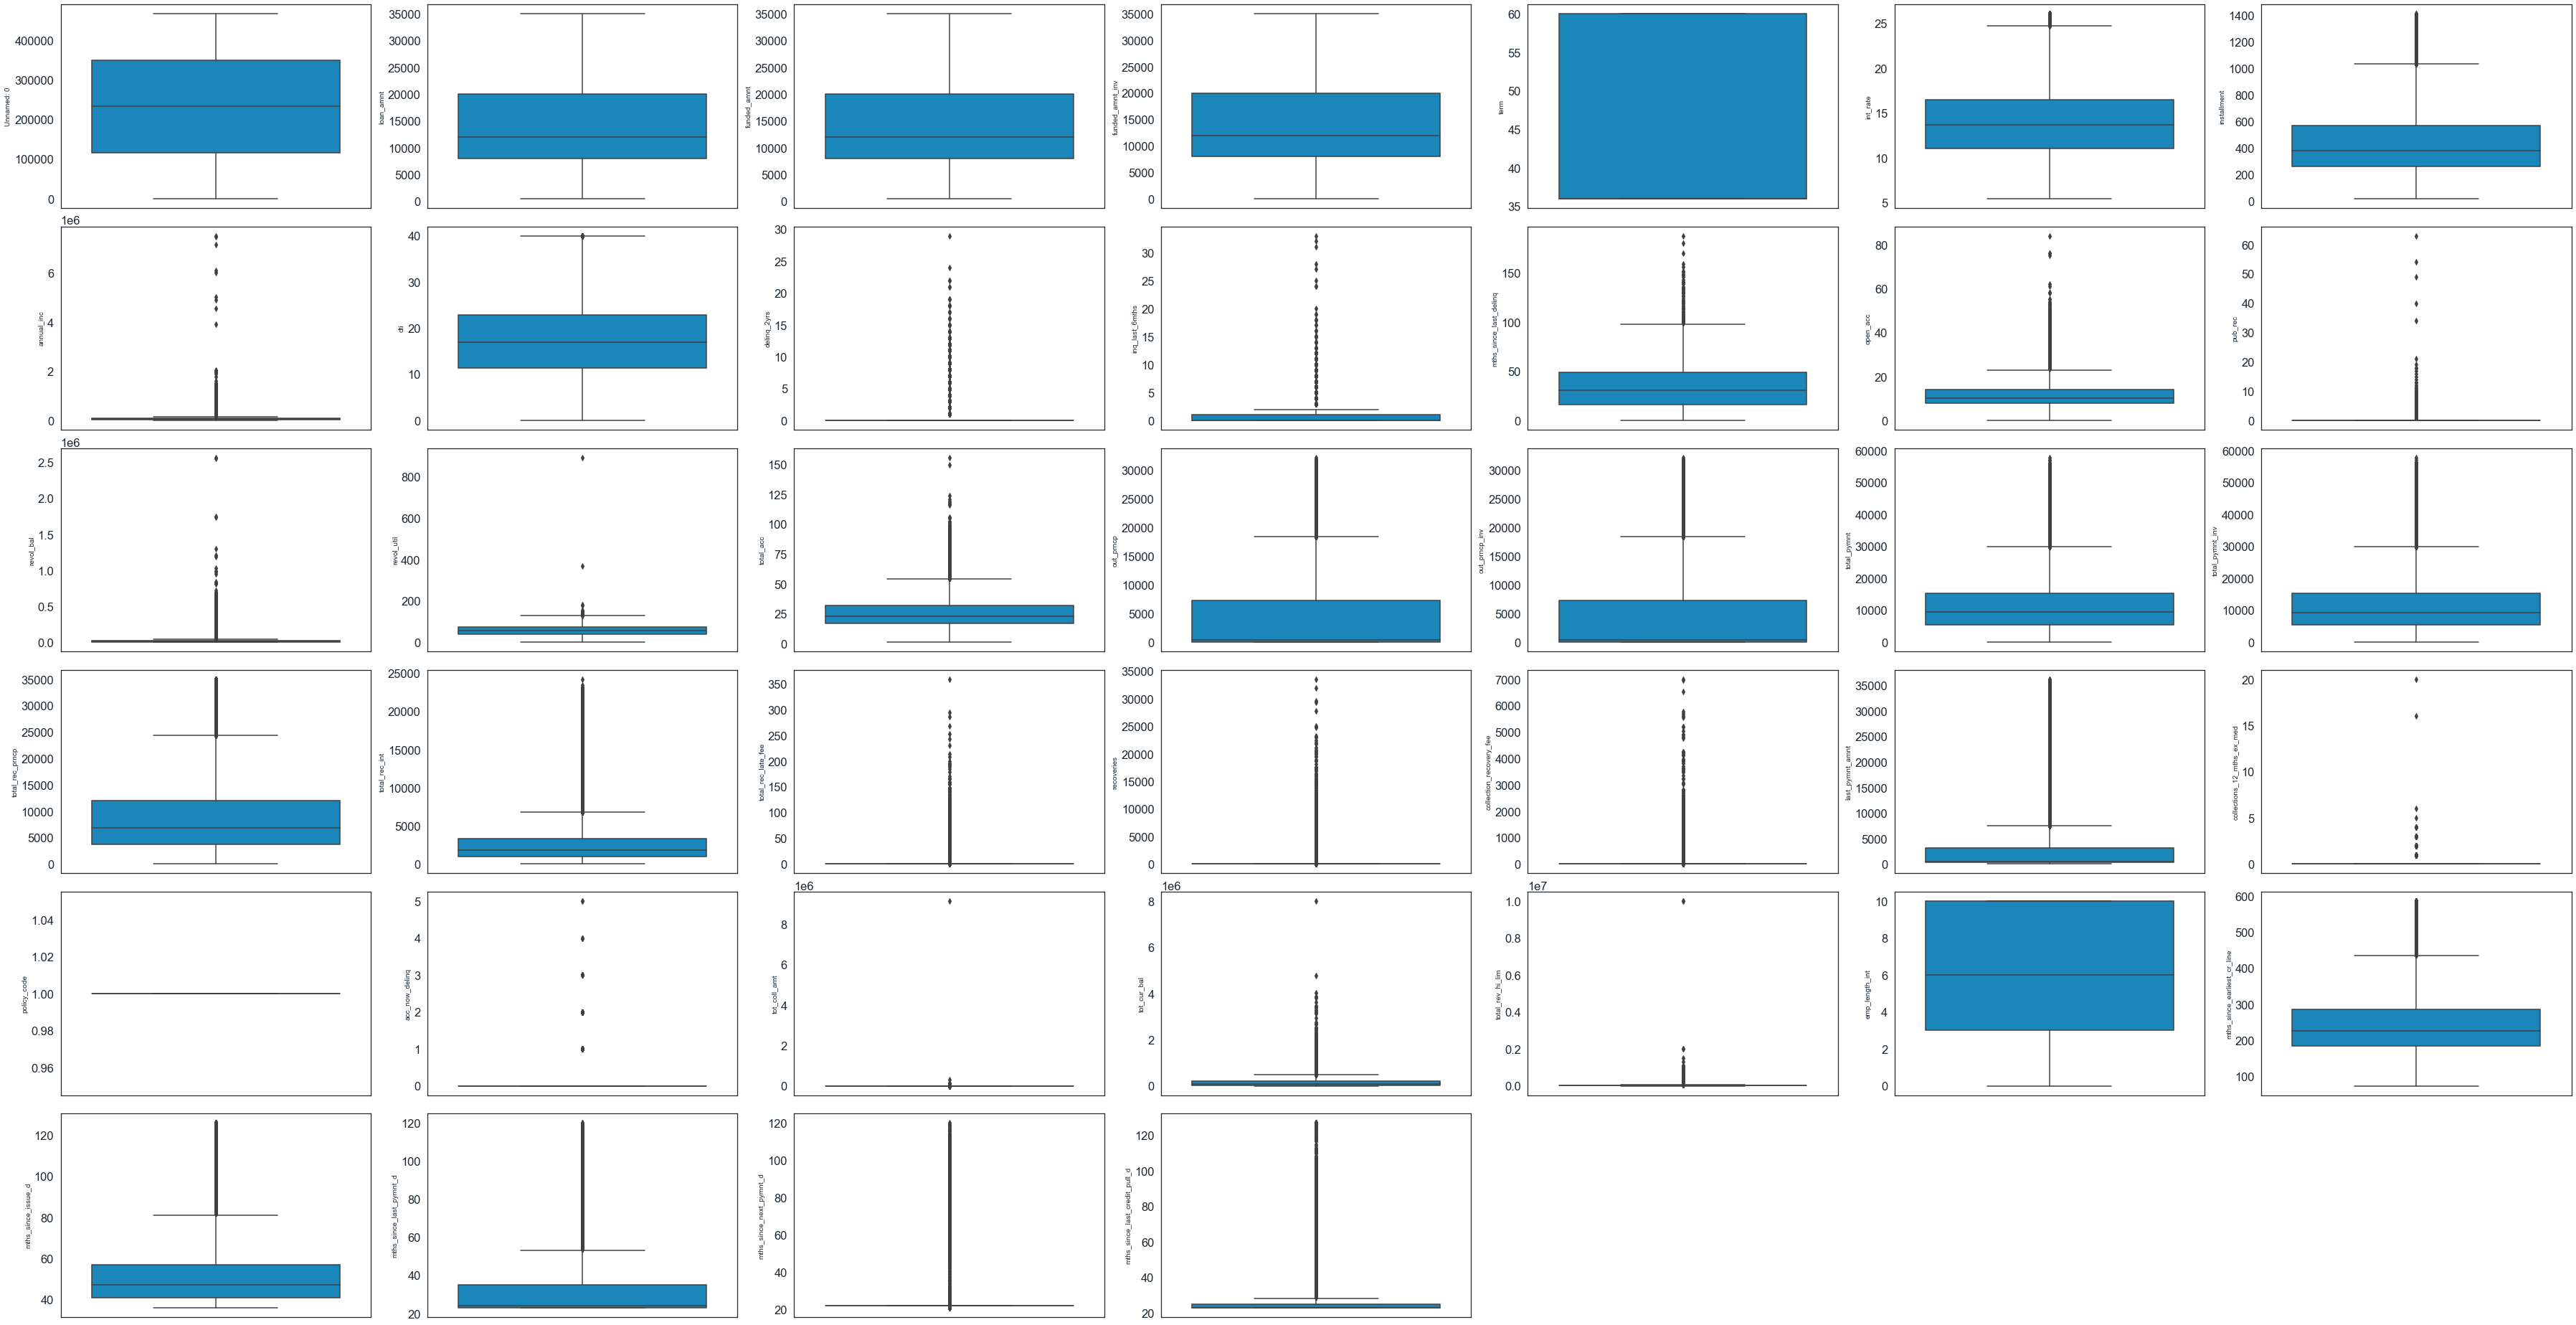

In [55]:
plt.figure(figsize=(50,30))
for i,j in enumerate(num):
        plt.subplot(7,7,i+1)
        sns.boxplot(y=datadrop[j])
        plt.tight_layout()

terdapat kolom yang memiliki outliers dan kolom yang hanya memiliki 1 variable, terdapat kolom yang memiliki nilai unique yang tidak akan mempengaruhi model.

In [56]:
kolom,out,high,low = [],[],[],[]
for i in num:
        q1 = datadrop[i].quantile(0.25)
        q3 = datadrop[i].quantile(0.75)
        iqr = q3-q1
        lowlimit = q1 - (1.5*iqr)
        highlimit = q3 + (iqr*1.5)

        outlier = datadrop[ (datadrop[i]<lowlimit) | (datadrop[i]>highlimit)].shape[0]

        if outlier>0:
                kolom.append(i)
                out.append(outlier)
                low.append(lowlimit)
                high.append(highlimit)

dataoutlier = pd.DataFrame({
        'Kolom':kolom,
        'Outliers':out,
        'Low Limit':low,
        'High Limit':high
})

dataoutlier['Persentase (%)'] = round(dataoutlier['Outliers']/datadrop.shape[0]*100,2)
dataoutlier

,Kolom,Outliers,Low Limit,High Limit,Persentase (%)
0,int_rate,4904,2.740,24.740,1.05
1,installment,11711,-208.145,1031.415,2.51
2,annual_inc,19899,-20940.000,154900.000,4.27
3,dti,43,-5.770,39.910,0.01
4,delinq_2yrs,83302,0.000,0.000,17.87
5,inq_last_6mths,36785,-1.500,2.500,7.89
6,mths_since_last_delinq,89,-33.500,98.500,0.02
7,open_acc,10440,-1.000,23.000,2.24
8,pub_rec,61363,0.000,0.000,13.16
9,revol_bal,22879,-14467.000,41213.000,4.91


tidak semua data yang terdeteksi sebagai outlier adalah outlier, ada beberapa data yang di kenyataaannya dedmikian. oleh akrena itu, harus cermat dalam menentukan data tersebut adalah outlier ataupun bukan. berdasarkan data ayng tersedia, saya menentukan bahwa tidak smeua data yang terdeteksi memiliki outlier adalah outlier, hanya beberapa data yang memiliki outlier sebenarnya yaitu : 

`total_rev_hi_lim`

`tot_cur_bal`

`tol_coll_amt`

`revol_util`

### HANDLE OUTLIERS

## UNIVARIATE ANALYSIS

<Axes: >

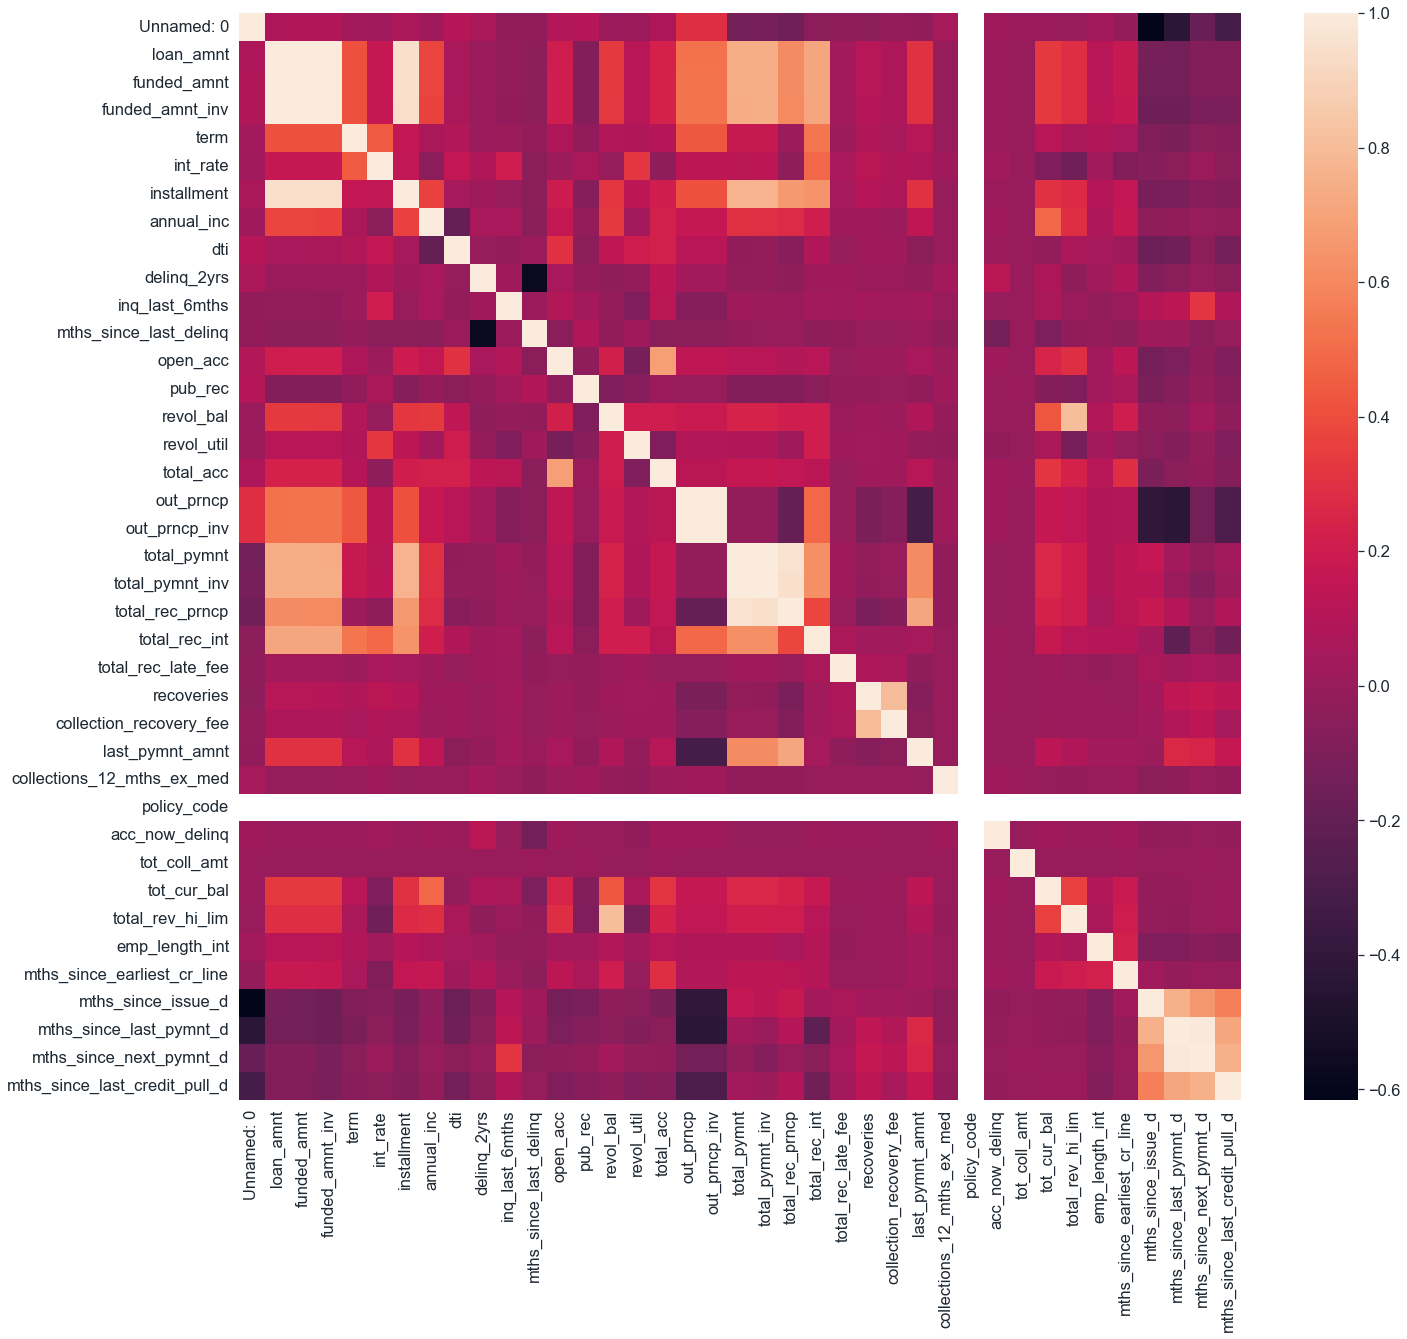

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(datadrop.corr())

pada tahap ini akan dilakukan filtering kolom yang memiliki korelasi tinggi, untuk kolom yang berkorelasi > 0.7 akan dianggap memiliki korelasi tinggi dan akan didrop salah satu kolom saja

In [58]:
corr_matrix = datadrop.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [59]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [60]:
datadrop.drop(to_drop_hicorr, axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3482153449.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### check Categorical Features

In [61]:
datadrop.select_dtypes(include='object').nunique()

grade                   7
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
addr_state             50
initial_list_status     2
dtype: int64

Pada tahap ini dilakukan pembuangan fitur yang memiliki nilai unik yang sangat tinggi (high cardinality) dan fitur yang hanya memiliki satu nilai unik saja.


In [62]:
# datadrop.drop(['emp_title', 'url','desc','title','zip_code','application_type'], axis=1, inplace=True)

In [63]:
datadrop.select_dtypes(exclude='object').nunique()

Unnamed: 0                     466285
loan_amnt                        1352
term                                2
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
emp_length_int                     11
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

terdapat fetaure yang hanya memiliki 1 unique value, maka feature tersebut akan didrop

In [64]:
datadrop.drop(['policy_code'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\1571130847.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
# terdapat kolom `Unnamed=0` yang tidak memiliki informasi apapun, maka akan didrop
datadrop.drop(['Unnamed: 0'], axis=1, inplace= True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3134098130.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
datadrop.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
term                                2
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
emp_length_int                     11
mths_since_earliest_cr_line       515
mths_since_issue_d                 91
dtype: int64

In [67]:
# plt.figure(figsize=(30,30))
# for i,j in enumerate(num):
#       plt.subplot(6,9,i+1)
#        sns.histplot(x=datadrop[j], bins=20)
#        plt.tight_layout()

In [68]:
for col in datadrop.select_dtypes(include='object').columns.tolist():
    print(datadrop[col].value_counts(normalize=True)*100)
    print('\n')

B    29.366
C    26.870
D    16.489
A    16.056
E     7.668
F     2.837
G     0.712
Name: grade, dtype: float64


MORTGAGE    5.059e+01
RENT        4.042e+01
OWN         8.944e+00
OTHER       3.903e-02
NONE        1.072e-02
ANY         2.145e-04
Name: home_ownership, dtype: float64


Verified           36.041
Source Verified    32.168
Not Verified       31.791
Name: verification_status, dtype: float64


n    99.998
y     0.002
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804
credit_card           22.338
home_improvement       5.691
other                  5.081
major_purchase         2.108
small_business         1.504
car                    1.157
medical                0.987
moving                 0.642
vacation               0.533
wedding                0.502
house                  0.487
educational            0.091
renewable_energy       0.075
Name: purpose, dtype: float64


CA    1.532e+01
NY    8.630e+00
TX    7.815e+00
FL    6.785e+00
IL    3.992e+00
NJ    3.873e+00


Feature `pymnt_plan` memiliki nilai yang didominasi oleh 1 value saja n= 99.998 dan y = 0.002 sehingga feature ini akan didrop

In [69]:
datadrop.drop(['pymnt_plan'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\518745531.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Missing Value Filling

In [70]:
check_missing = datadrop.isnull().sum() * 100 / datadrop.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_delinq         5.369e+01
tot_coll_amt                   1.507e+01
tot_cur_bal                    1.507e+01
emp_length_int                 4.505e+00
revol_util                     7.292e-02
collections_12_mths_ex_med     3.110e-02
delinq_2yrs                    6.219e-03
inq_last_6mths                 6.219e-03
open_acc                       6.219e-03
pub_rec                        6.219e-03
total_acc                      6.219e-03
acc_now_delinq                 6.219e-03
mths_since_earliest_cr_line    6.219e-03
annual_inc                     8.578e-04
dtype: float64

In [71]:
# `mths_since_last_delinq` menunjukkan kapan terakhir customer tersebut melakukan kenakalan. customer yang tidak melakukan kenakalan akan diisi dengan value 0
datadrop[['mths_since_last_delinq']]=datadrop[['mths_since_last_delinq']].fillna(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\2574395011.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
# kolom `next_pymnt_d` memberikan informasi jadwal pembayaran customer selanjutnya, customer yang tidak memiliki jadwal pembayaran selanjutnya akan diisi dengan value '0'
#datadrop[['next_pymnt_d']]= datadrop[['next_pymnt_d']].fillna(0) 

In [73]:
# 'tot_cur_bal', 'tot_coll_amt', 'total_rev_hi_lim', akan diisi dengan nilai mean
datadrop[['tot_cur_bal']]=datadrop[['tot_cur_bal']].fillna(0)
datadrop[['tot_coll_amt']]=datadrop[['tot_coll_amt']].fillna(0)
#datadrop[['total_rev_hi_lim']]=datadrop[['total_rev_hi_lim']].fillna(datadrop['total_rev_hi_lim'].mean())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\907767420.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\907767420.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
# `emp_title` akan diisi dengan value other
#datadrop[['emp_title']]=datadrop[['emp_title']].fillna('Others')

In [75]:
# `emp_length` akan difill dengan frekuennsi value terbanyak '0'
datadrop[['emp_length_int']]=datadrop[['emp_length_int']].fillna(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3942735185.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
datadrop[['revol_util','collections_12_mths_ex_med', 'pub_rec','inq_last_6mths', 'delinq_2yrs', 'open_acc', 'acc_now_delinq', 'total_acc', 'annual_inc']].describe()

,revol_util,collections_12_mths_ex_med,pub_rec,inq_last_6mths,delinq_2yrs,open_acc,acc_now_delinq,total_acc,annual_inc
count,465945.000,466140.000,466256.000,466256.000,466256.000,466256.000,466256.000,466256.000,4.663e+05
mean,56.177,0.009,0.161,0.805,0.285,11.187,0.004,25.064,7.328e+04
std,23.733,0.109,0.511,1.092,0.797,4.988,0.069,11.600,5.496e+04
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.896e+03
25%,39.200,0.000,0.000,0.000,0.000,8.000,0.000,17.000,4.500e+04
50%,57.600,0.000,0.000,0.000,0.000,10.000,0.000,23.000,6.300e+04
75%,74.700,0.000,0.000,1.000,0.000,14.000,0.000,32.000,8.896e+04
max,892.300,20.000,63.000,33.000,29.000,84.000,5.000,156.000,7.500e+06


In [77]:
# Columns 'revol_util','collections_12_mths_ex_med', 'pub_rec','inq_last_6mths', 'delinq_2yrs', 'open_acc', 'acc_now_delinq', 'total_acc', 'annual_inc' will filled with mean value
datadrop[['revol_util']]= datadrop[['revol_util']].fillna(0)
datadrop[['collections_12_mths_ex_med']]= datadrop[['collections_12_mths_ex_med']].fillna(0)
datadrop[['pub_rec']]= datadrop[['pub_rec']].fillna(0)
datadrop[['inq_last_6mths']]= datadrop[['inq_last_6mths']].fillna(0)
datadrop[['delinq_2yrs']]= datadrop[['delinq_2yrs']].fillna(0)
datadrop[['open_acc']]= datadrop[['open_acc']].fillna(0)
datadrop[['acc_now_delinq']]= datadrop[['acc_now_delinq']].fillna(0)
datadrop[['total_acc']]= datadrop[['total_acc']].fillna(0)
datadrop[['annual_inc']]= datadrop[['annual_inc']].fillna(datadrop[['annual_inc']].mean())




C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3004435782.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3004435782.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3004435782.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

# Columns 'revol_util','collections_12_mths_ex_med', 'pub_rec','inq_last_6mths', 'delinq_2yrs', 'open_acc', 'acc_now_delinq', 'total_acc', 'annual_inc' will filled with mean value
datadrop[['revol_util']]= datadrop[['revol_util']].fillna(datadrop[['revol_util']].mean())
datadrop[['collections_12_mths_ex_med']]= datadrop[['collections_12_mths_ex_med']].fillna(datadrop[['collections_12_mths_ex_med']].mean())
datadrop[['pub_rec']]= datadrop[['pub_rec']].fillna(datadrop[['pub_rec']].mean())
datadrop[['inq_last_6mths']]= datadrop[['inq_last_6mths']].fillna(datadrop[['inq_last_6mths']].mean())
datadrop[['delinq_2yrs']]= datadrop[['delinq_2yrs']].fillna(datadrop[['delinq_2yrs']].mean())
datadrop[['open_acc']]= datadrop[['open_acc']].fillna(datadrop[['open_acc']].mean())
datadrop[['acc_now_delinq']]= datadrop[['acc_now_delinq']].fillna(datadrop[['acc_now_delinq']].mean())
datadrop[['total_acc']]= datadrop[['total_acc']].fillna(datadrop[['total_acc']].mean())
datadrop[['annual_inc']]= datadrop[['annual_inc']].fillna(datadrop[['annual_inc']].mean())




In [78]:
datadrop[['mths_since_earliest_cr_line']]= datadrop[['mths_since_earliest_cr_line']].fillna(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5576\3160223142.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
datadrop.isnull().sum().sort_values(ascending=False)

loan_amnt                      0
revol_bal                      0
mths_since_earliest_cr_line    0
emp_length_int                 0
tot_cur_bal                    0
tot_coll_amt                   0
acc_now_delinq                 0
collections_12_mths_ex_med     0
recoveries                     0
total_rec_late_fee             0
out_prncp                      0
initial_list_status            0
total_acc                      0
revol_util                     0
pub_rec                        0
term                           0
open_acc                       0
mths_since_last_delinq         0
inq_last_6mths                 0
delinq_2yrs                    0
dti                            0
addr_state                     0
purpose                        0
verification_status            0
annual_inc                     0
home_ownership                 0
grade                          0
int_rate                       0
mths_since_issue_d             0
dtype: int64

## FEATURE SCALLING AND TRANSFORMATION

### One Hot Encoding
semua data bertipe Categorical akan dilakukan One Hot Encoding

In [80]:
categorical_cols = [col for col in datadrop.select_dtypes(include='object').columns.tolist()]

In [81]:
onehot = pd.get_dummies(datadrop[categorical_cols], drop_first=True)

In [82]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standarization
semua kolom numeric akan dilakukan standarisasi untuk melakukan pemodelan

In [83]:
numerical_cols = [col for col in datadrop.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [84]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(datadrop[numerical_cols]), columns=numerical_cols)

In [85]:
std.head()

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124,-0.616,-0.730,-0.897,1.329,-0.357,0.179,-0.700,-1.641,-0.314,-0.125,1.159,-1.385,-0.694,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,1.765,1.447
1,-1.426,1.623,0.331,-0.787,-2.066,-0.357,3.843,-0.700,-1.641,-0.314,-0.703,-1.966,-1.816,-0.694,-0.123,0.057,-0.084,-0.058,-0.012,-0.793,-1.524,-0.212,1.447
2,-1.438,-0.616,0.489,-1.110,-1.082,-0.357,1.095,-0.700,-1.842,-0.314,-0.642,1.782,-1.298,-0.694,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,-0.571,1.447
3,-0.521,-0.616,-0.078,-0.438,0.354,-0.357,0.179,0.851,-0.238,-0.314,-0.514,-1.478,1.029,-0.694,3.099,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,0.227,1.447
4,-1.366,1.623,-0.261,0.122,0.092,-0.357,-0.737,0.984,0.765,-0.314,0.559,-0.094,1.115,-0.573,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,-1.258,0.239,1.447


In [86]:
data_model = pd.concat([onehot, std, data_eda[['target']]], axis=1)

In [87]:
data_model.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,target
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.124,-0.616,-0.730,-0.897,1.329,-0.357,0.179,-0.700,-1.641,-0.314,-0.125,1.159,-1.385,-0.694,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,1.765,1.447,1
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.426,1.623,0.331,-0.787,-2.066,-0.357,3.843,-0.700,-1.641,-0.314,-0.703,-1.966,-1.816,-0.694,-0.123,0.057,-0.084,-0.058,-0.012,-0.793,-1.524,-0.212,1.447,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.438,-0.616,0.489,-1.110,-1.082,-0.357,1.095,-0.700,-1.842,-0.314,-0.642,1.782,-1.298,-0.694,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,-0.571,1.447,1
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.521,-0.616,-0.078,-0.438,0.354,-0.357,0.179,0.851,-0.238,-0.314,-0.514,-1.478,1.029,-0.694,3.099,-0.155,-0.084,-0.058,-0.012,-0.793,1.139,0.227,1.447,1
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.366,1.623,-0.261,0.122,0.092,-0.357,-0.737,0.984,0.765,-0.314,0.559,-0.094,1.115,-0.573,-0.123,-0.155,-0.084,-0.058,-0.012,-0.793,-1.258,0.239,1.447,1


# MODELING

 - Kasus False Negative

 Customer yang diprediksi risk tapi data aktualnya tidak risk

 - Kasus False Positive

 Karyawan yang diprediksi tidak risk tapi data aktualnya risk

Metriks yang kita gunakan dalam case ini adalah roc_auc, karena kita sama sama mementingkan FN dan FP, selain itu dataset ini juga termasuk imbalance 


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_train = model.predict_proba(X_train)

        print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
        print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
        print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
        print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

        print("\nroc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
        print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

        score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
        print('\nroc_auc (crossval train): '+ str(round(score['train_score'].mean(),2)))
        print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(),2)))

def show_feature_importance(model):
        feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x.columns)
        ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
        ax.invert_yaxis()

        plt.xlabel('score')
        plt.ylabel('feature')
        plt.title('feature importance score')

model,accuracy,precision,recall,f1,auc,status=[],[],[],[],[],[],[]

## Data Splitting

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = data_model.drop('target', axis=1)
y = data_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

### Handling Imbalance

In [92]:
print('Before\n',y_train.value_counts())

from imblearn import over_sampling
X_train, y_train = over_sampling.SMOTE().fit_resample(X_train, y_train)

print('\nAfter\n',y_train.value_counts())

Before
 1    327165
0     45863
Name: target, dtype: int64

After
 1    327165
0    327165
Name: target, dtype: int64


## Data Training

### 1. Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [95]:
eval_classification(rfc)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.94
Recall (Test Set): 0.89
F1-Score (Test Set): 0.92

roc_auc (train-proba): 0.88
roc_auc (test-proba): 0.81

roc_auc (crossval train): 0.84
roc_auc (crossval test): 0.74


In [96]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
91,recoveries,0.354
89,out_prncp,0.134
78,int_rate,0.094
98,mths_since_issue_d,0.058
75,initial_list_status_w,0.054
...,...,...
60,addr_state_OK,0.000
63,addr_state_RI,0.000
64,addr_state_SC,0.000
65,addr_state_SD,0.000


#### 1.a ROC AUC

In [97]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score

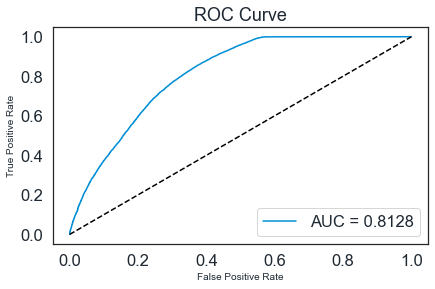

In [99]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### 1.b Kolmogorov Smirnov 

In [100]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [101]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,392775,0,0.186,1,0,1,1.072e-05,0.0,8.728e-05
1,391181,0,0.188,2,0,2,2.145e-05,0.0,1.746e-04
2,154460,0,0.198,3,0,3,3.217e-05,0.0,2.618e-04
3,127802,0,0.199,4,0,4,4.289e-05,0.0,3.491e-04
4,210408,0,0.200,5,0,5,5.362e-05,0.0,4.364e-04


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.4811')

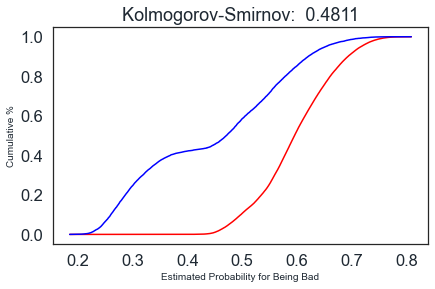

In [102]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

### 2. Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=110)
lr.fit(X_train, y_train)

eval_classification(lr)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy (Test Set): 0.92
Precision (Test Set): 0.93
Recall (Test Set): 0.99
F1-Score (Test Set): 0.95

roc_auc (train-proba): 0.96
roc_auc (test-proba): 0.80


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ASUS\anaconda3\lib\site-packages\sk


roc_auc (crossval train): 0.83
roc_auc (crossval test): 0.79


#### 2.a ROC AUC

In [104]:
y_pred_proba_lr = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted_lr = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_lr, columns=['y_pred_proba_lr'])], axis=1)
df_actual_predicted_lr.index = y_test.index

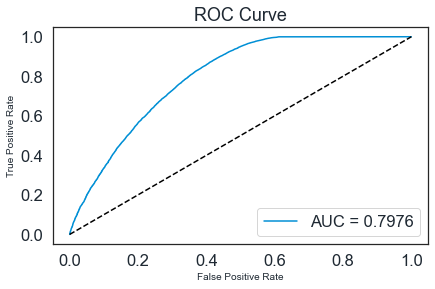

In [118]:
fpr, tpr, tr = roc_curve(df_actual_predicted_lr['y_actual'], df_actual_predicted_lr['y_pred_proba_lr'])
auc = roc_auc_score(df_actual_predicted_lr['y_actual'], df_actual_predicted_lr['y_pred_proba_lr'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### 2.b Kolmogorov Smirnov 

In [106]:
df_actual_predicted_lr = df_actual_predicted_lr.sort_values('y_pred_proba_lr')
df_actual_predicted_lr = df_actual_predicted_lr.reset_index()

df_actual_predicted_lr['Cumulative N Population'] = df_actual_predicted_lr.index + 1
df_actual_predicted_lr['Cumulative N Bad'] = df_actual_predicted_lr['y_actual'].cumsum()
df_actual_predicted_lr['Cumulative N Good'] = df_actual_predicted_lr['Cumulative N Population'] - df_actual_predicted_lr['Cumulative N Bad']
df_actual_predicted_lr['Cumulative Perc Population'] = df_actual_predicted_lr['Cumulative N Population'] / df_actual_predicted_lr.shape[0]
df_actual_predicted_lr['Cumulative Perc Bad'] = df_actual_predicted_lr['Cumulative N Bad'] / df_actual_predicted_lr['y_actual'].sum()
df_actual_predicted_lr['Cumulative Perc Good'] = df_actual_predicted_lr['Cumulative N Good'] / (df_actual_predicted_lr.shape[0] - df_actual_predicted_lr['y_actual'].sum())

In [107]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,392775,0,0.186,1,0,1,1.072e-05,0.0,8.728e-05
1,391181,0,0.188,2,0,2,2.145e-05,0.0,1.746e-04
2,154460,0,0.198,3,0,3,3.217e-05,0.0,2.618e-04
3,127802,0,0.199,4,0,4,4.289e-05,0.0,3.491e-04
4,210408,0,0.200,5,0,5,5.362e-05,0.0,4.364e-04


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.4609')

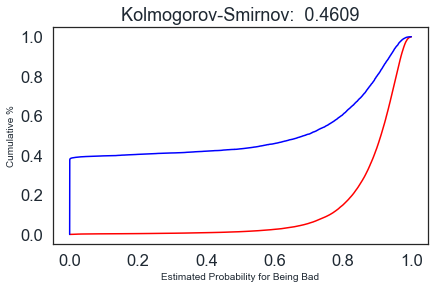

In [108]:
KS = max(df_actual_predicted_lr['Cumulative Perc Good'] - df_actual_predicted_lr['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_lr['y_pred_proba_lr'], df_actual_predicted_lr['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_lr['y_pred_proba_lr'], df_actual_predicted_lr['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

#### Tunning Hyperparameter

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 1, 100)]

hyperparam = {
        'penalty':penalty,
        'C':C
}

lr = LogisticRegression(max_iter=150)
lr.fit(X_train, y_train)

rs = RandomizedSearchCV(lr, hyperparam, cv=5, scoring='roc_auc', random_state=7, n_iter=50)
rs.fit(X_train, y_train)

eval_classification(rs)

model.append('Logistic Regression')
accuracy.append(74)
precision.append(35)
recall.append(69)
f1.append(46)
auc.append(81)
status.append('Best Fit')

#### 3. ADA

In [109]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

eval_classification(ada)


Accuracy (Test Set): 0.88
Precision (Test Set): 0.94
Recall (Test Set): 0.93
F1-Score (Test Set): 0.93

roc_auc (train-proba): 0.94
roc_auc (test-proba): 0.81

roc_auc (crossval train): 0.87
roc_auc (crossval test): 0.71


#### 3.a ROC AUC

In [110]:
y_pred_proba_ada = ada.predict_proba(X_test)[:][:,1]

df_actual_predicted_ada = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_ada, columns=['y_pred_proba_ada'])], axis=1)
df_actual_predicted_ada.index = y_test.index

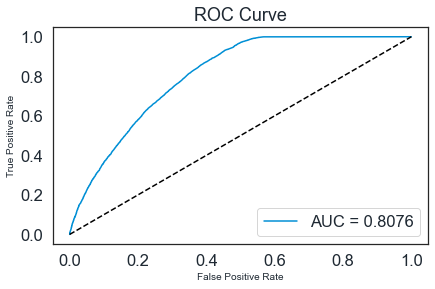

In [111]:
fpr, tpr, tr = roc_curve(df_actual_predicted_ada['y_actual'], df_actual_predicted_ada['y_pred_proba_ada'])
auc = roc_auc_score(df_actual_predicted_ada['y_actual'], df_actual_predicted_ada['y_pred_proba_ada'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### 3.b Kolmogorov Smirnov 

In [112]:
df_actual_predicted_ada = df_actual_predicted_ada.sort_values('y_pred_proba_ada')
df_actual_predicted_ada = df_actual_predicted_ada.reset_index()

df_actual_predicted_ada['Cumulative N Population'] = df_actual_predicted_ada.index + 1
df_actual_predicted_ada['Cumulative N Bad'] = df_actual_predicted_ada['y_actual'].cumsum()
df_actual_predicted_ada['Cumulative N Good'] = df_actual_predicted_ada['Cumulative N Population'] - df_actual_predicted_ada['Cumulative N Bad']
df_actual_predicted_ada['Cumulative Perc Population'] = df_actual_predicted_ada['Cumulative N Population'] / df_actual_predicted_ada.shape[0]
df_actual_predicted_ada['Cumulative Perc Bad'] = df_actual_predicted_ada['Cumulative N Bad'] / df_actual_predicted_ada['y_actual'].sum()
df_actual_predicted_ada['Cumulative Perc Good'] = df_actual_predicted_ada['Cumulative N Good'] / (df_actual_predicted_ada.shape[0] - df_actual_predicted_ada['y_actual'].sum())

In [113]:
df_actual_predicted_ada.head()

,index,y_actual,y_pred_proba_ada,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,41798,0,0.302,1,0,1,1.072e-05,0.0,8.728e-05
1,39105,0,0.304,2,0,2,2.145e-05,0.0,1.746e-04
2,42366,0,0.305,3,0,3,3.217e-05,0.0,2.618e-04
3,38374,0,0.307,4,0,4,4.289e-05,0.0,3.491e-04
4,41676,0,0.308,5,0,5,5.362e-05,0.0,4.364e-04


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.4776')

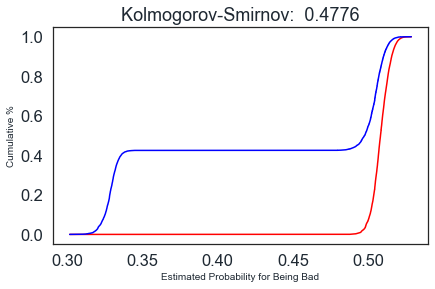

In [114]:
KS = max(df_actual_predicted_ada['Cumulative Perc Good'] - df_actual_predicted_ada['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_ada['y_pred_proba_ada'], df_actual_predicted_ada['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_ada['y_pred_proba_ada'], df_actual_predicted_ada['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

# Kesimpulan

1. Model Random Forest menghasilkan performa `AUC = 0.813` dan `KS = 0.49`. 
2. Model Linear Regression menghasilkan performa `AUC = 0.797` dan `KS = 0.46`. 
3. Model ADA Boost menghasilkan performa `AUC = 0.809` dan `KS = 0.48`. 
 
Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

berdasarkan training model dengan beberapa metode, model Random Forest menghasilkan nilai yang lebih baik daripada model lainnya. maka dari itu, hasil model random forest akan dijadikan hasil akhir pada proses kali ini